# Predicting Gamer Behavior

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-online-gaming-behavior-dataset

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
gamer = pd.read_csv("online_gaming_behavior_dataset.csv")
df = gamer.copy()

In [3]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

In [5]:
# There are no missing values.

In [6]:
df.shape

(40034, 13)

In [7]:
df.nunique()

PlayerID                     40034
Age                             35
Gender                           2
Location                         4
GameGenre                        5
PlayTimeHours                40034
InGamePurchases                  2
GameDifficulty                   3
SessionsPerWeek                 20
AvgSessionDurationMinutes      170
PlayerLevel                     99
AchievementsUnlocked            50
EngagementLevel                  3
dtype: int64

In [8]:
df.select_dtypes(include=["object"]).nunique()

Gender             2
Location           4
GameGenre          5
GameDifficulty     3
EngagementLevel    3
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PlayerID,40034.0,29016.500000,11556.964675,9000.000000,19008.250000,29016.500000,39024.750000,49033.000000
Age,40034.0,31.992531,10.043227,15.000000,23.000000,32.000000,41.000000,49.000000
PlayTimeHours,40034.0,12.024365,6.914638,0.000115,6.067501,12.008002,17.963831,23.999592
InGamePurchases,40034.0,0.200854,0.400644,0.000000,0.000000,0.000000,0.000000,1.000000
SessionsPerWeek,40034.0,9.471774,5.763667,0.000000,4.000000,9.000000,14.000000,19.000000
AvgSessionDurationMinutes,40034.0,94.792252,49.011375,10.000000,52.000000,95.000000,137.000000,179.000000
PlayerLevel,40034.0,49.655568,28.588379,1.000000,25.000000,49.000000,74.000000,99.000000
AchievementsUnlocked,40034.0,24.526477,14.430726,0.000000,12.000000,25.000000,37.000000,49.000000


In [10]:
# We won't need "PlayerID" column

df = df.drop(columns=["PlayerID"])

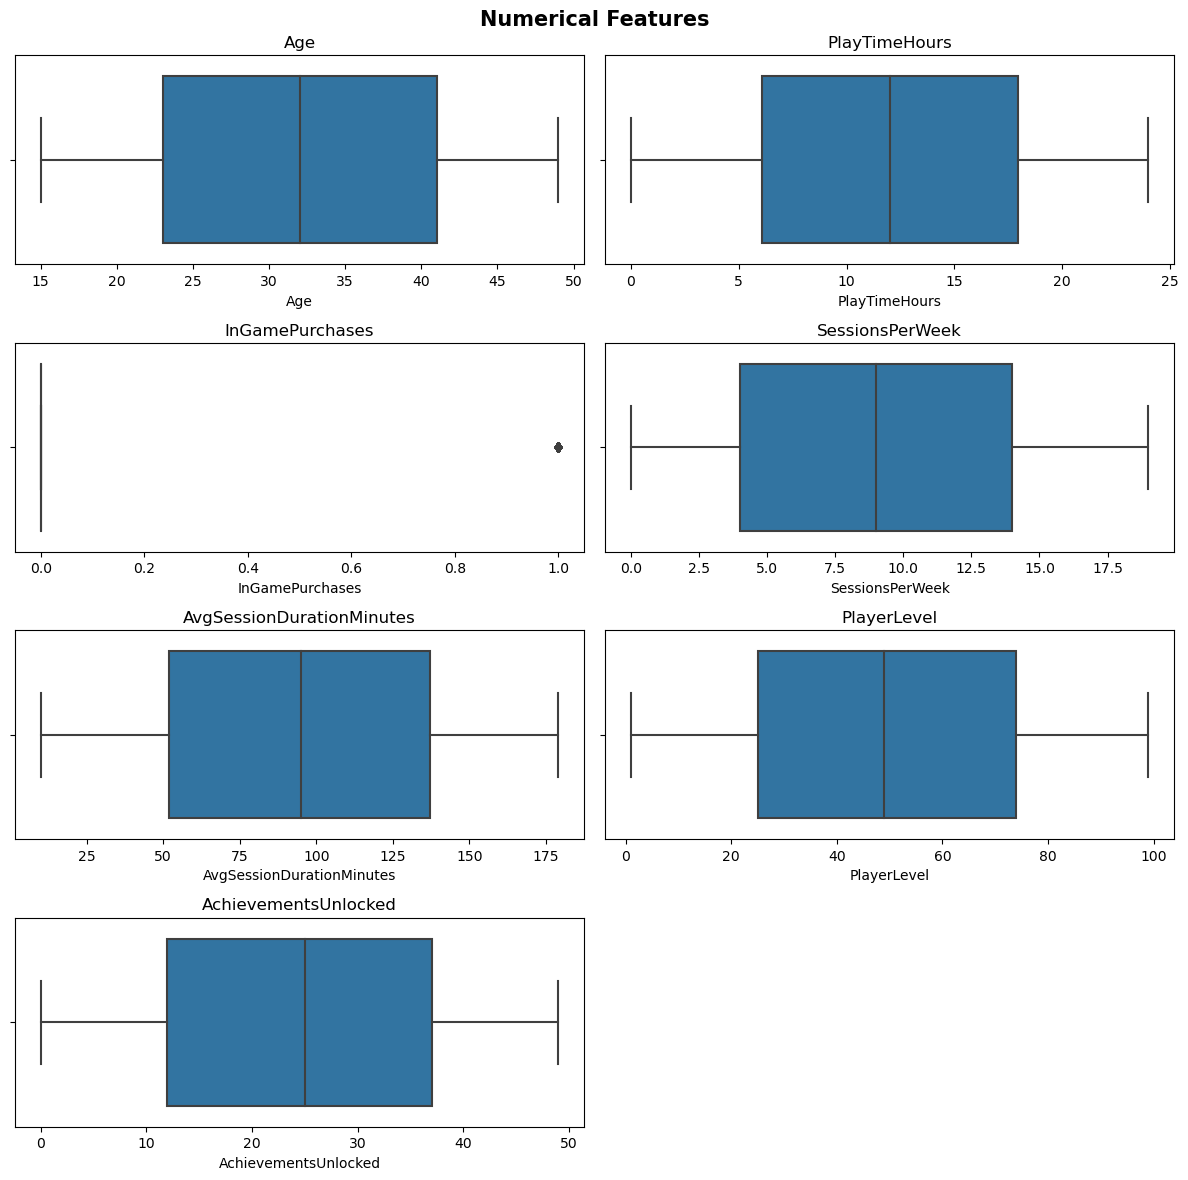

In [11]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.boxplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["int64", "float64"]).columns), 4 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Numerical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [12]:
for i, column in enumerate(df.select_dtypes(include=["object"])):
    print(df[column].value_counts())
    print("\n")

Gender
Male      23959
Female    16075
Name: count, dtype: int64


Location
USA       16000
Europe    12004
Asia       8095
Other      3935
Name: count, dtype: int64


GameGenre
Sports        8048
Action        8039
Strategy      8012
Simulation    7983
RPG           7952
Name: count, dtype: int64


GameDifficulty
Easy      20015
Medium    12011
Hard       8008
Name: count, dtype: int64


EngagementLevel
Medium    19374
High      10336
Low       10324
Name: count, dtype: int64




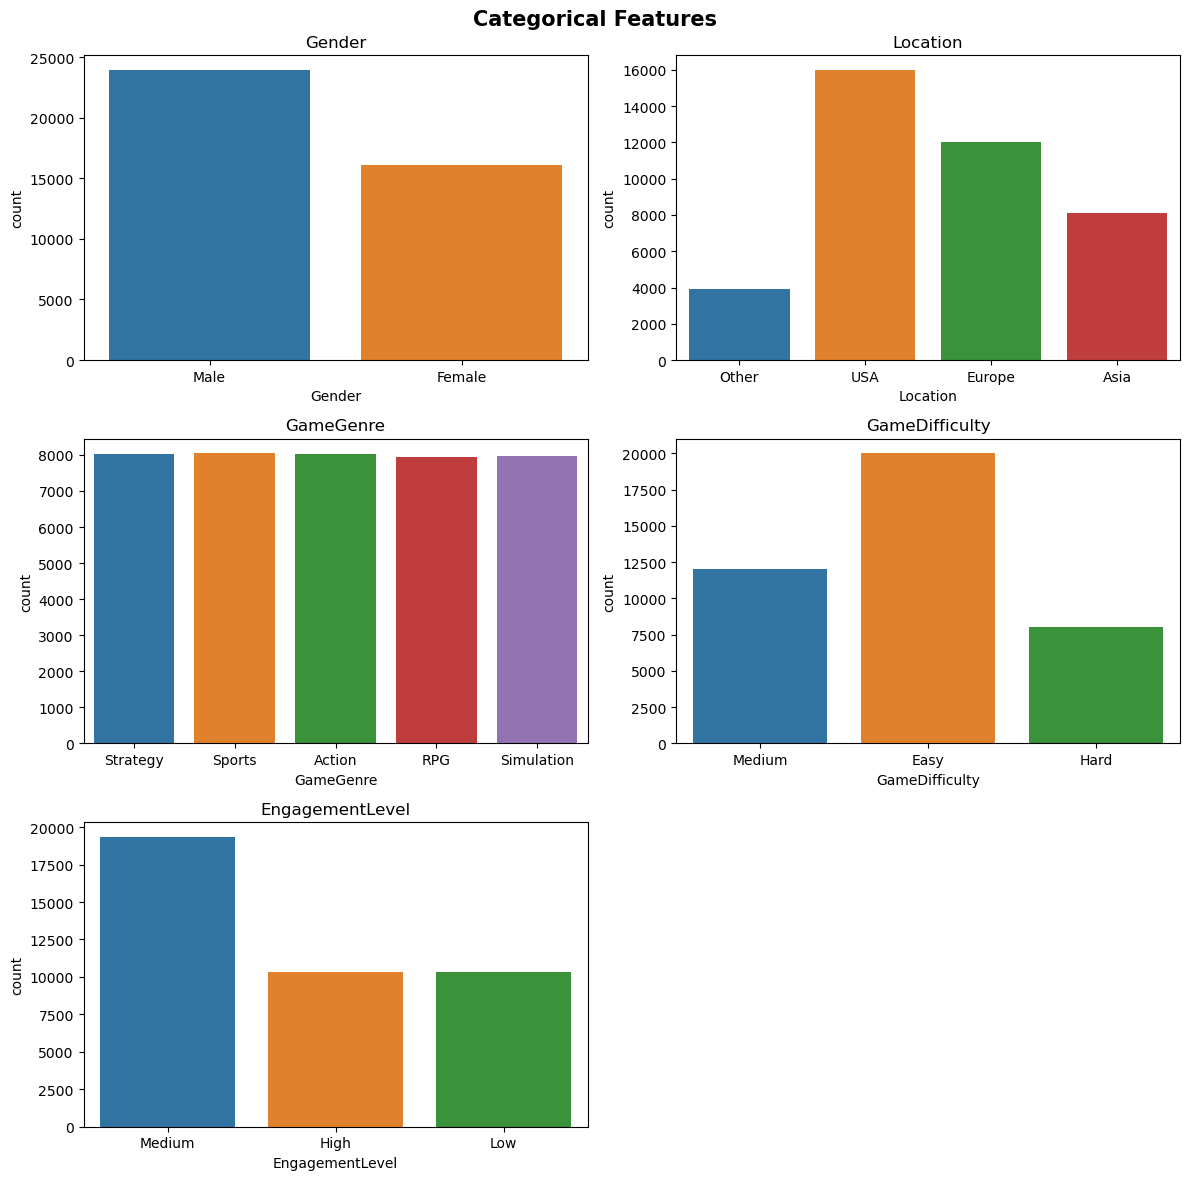

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["object"])):
    sns.countplot(x=df[column], ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["object"]).columns), 3 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Categorical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

In [14]:
# There are no outliers for both numerical and categorical features.

## Analyzing Relasionships

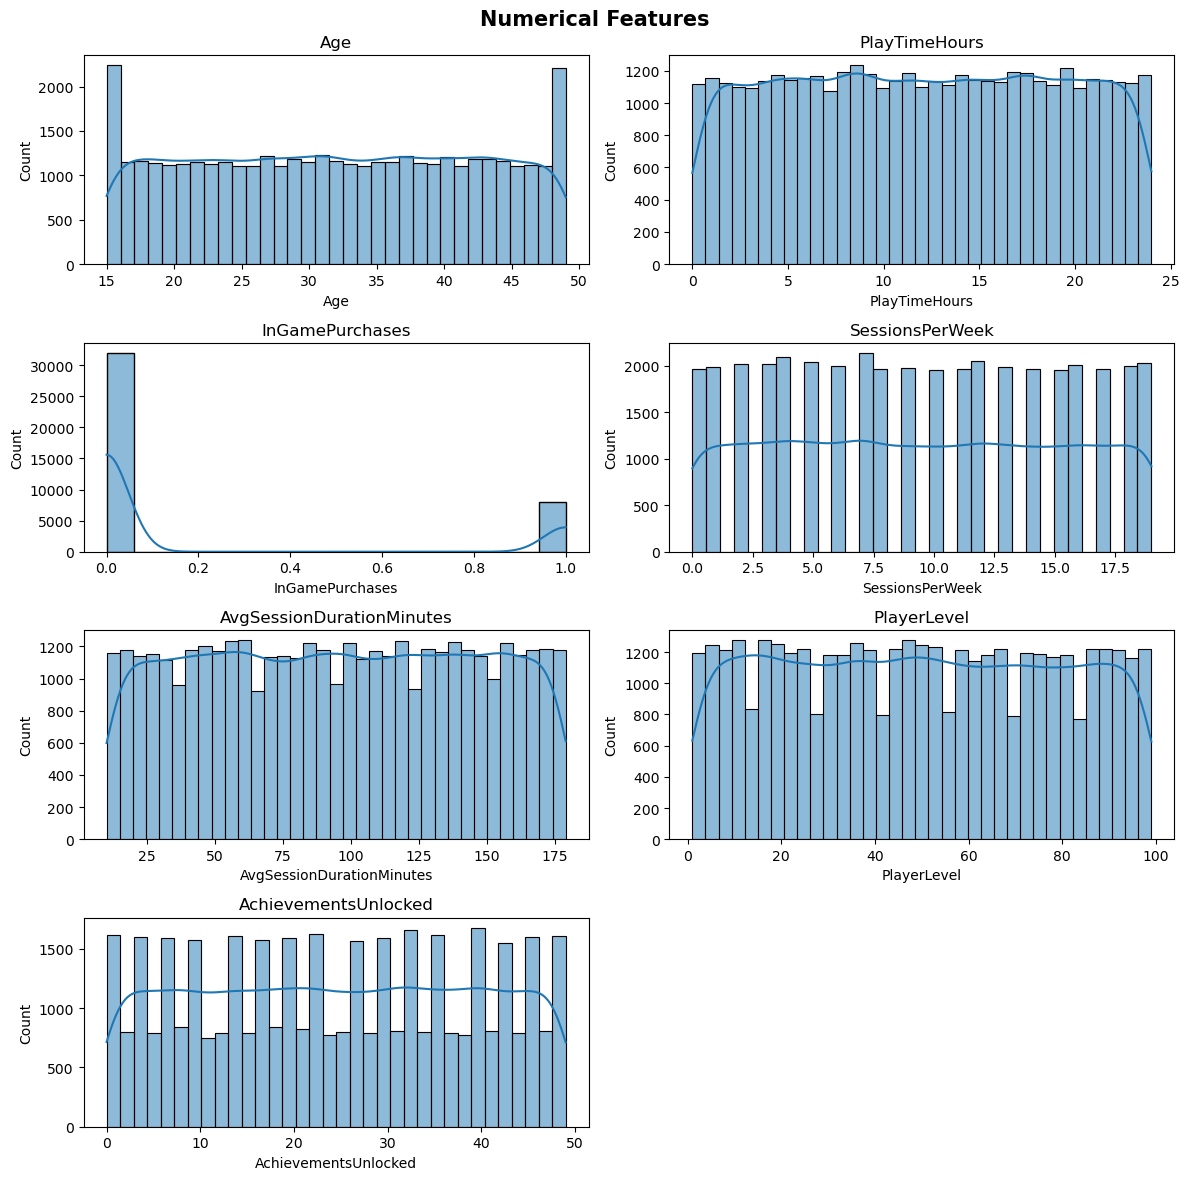

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

for i, column in enumerate(df.select_dtypes(include=["int64", "float64"])):
    sns.histplot(x=df[column], kde=True, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(column)
    
for i in range(len(df.select_dtypes(include=["int64", "float64"]).columns), 4 * 2):
    fig.delaxes(axes[i // 2, i % 2])
    
plt.suptitle("Numerical Features", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()